## Linear Regression using Scikit-Learn

### Gradient Descent

Scikit-learn has a gradient descent regression model [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#examples-using-sklearn-linear-model-sgdregressor).  Like the previous implementation of gradient descent, this model performs best with normalized inputs.

### Normalization

[sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) will perform z-score normalization. Here it is referred to as 'standard score'.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

### Load dataset

In [5]:
data=np.loadtxt('../data/houses.txt', delimiter=',', skiprows=1)

X_train=data[:,:4]
y_train=data[:,4]

X_features=['size(sqft)','bedrooms','floors','age']

### Scale/normalize training data

In [6]:
scaler=StandardScaler()
X_norm=scaler.fit_transform(X_train)

print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2.406e+03 4.000e+00 1.000e+00 9.500e+01]
Peak to Peak range by column in Normalized X:[5.8452591  6.13529646 2.05626214 3.68533012]


### Create and fit the regression model

In [24]:
sgdr=SGDRegressor(max_iter=1000)
sgdr.fit(X_norm,y_train)
print(sgdr)

print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 135, number of weight updates: 13366.0


### View parameters

In [25]:
b_norm=sgdr.intercept_
w_norm=sgdr.coef_

print(f"w: {w_norm}, b: {b_norm}")

w: [110.27347719 -21.09870883 -32.52437185 -38.02424335], b: [363.16967597]


### Make predictions
Predict the targets of the training data. Use both the `predict` routine and compute using $w$ and $b$.

In [29]:
# make a prediction using sgdr.predict()
y_pred_sgdr=sgdr.predict(X_norm)

# make a prediction using w,b. 
y_pred=np.dot(X_norm,w_norm)+b_norm

print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgdr).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[295.18633717 485.97262946 389.62112652 492.1376226 ]
Target values 
[300.  509.8 394.  540. ]


### Plot Results
Let's plot the predictions versus the target values.

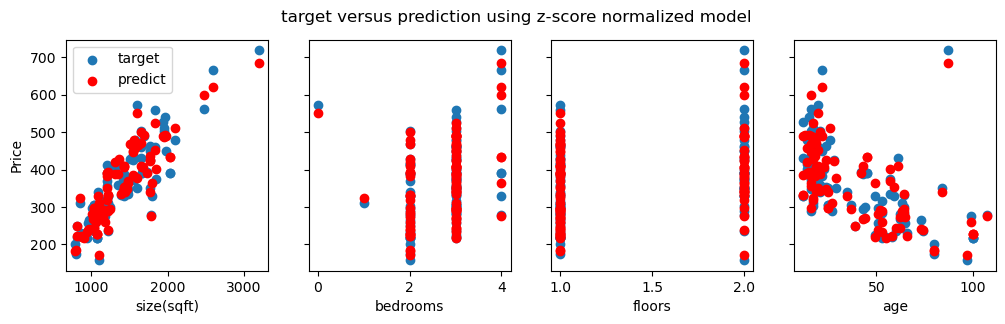

In [31]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color='r', label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()